In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Pré processamento da imagem

- Carrega a imagem
- transforma a imagem para a escala de tons de cinza
- binaliza a imagem

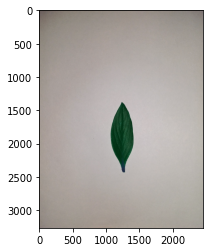

In [ ]:
image = cv2.imread("063.jpg")
plt.imshow(image)

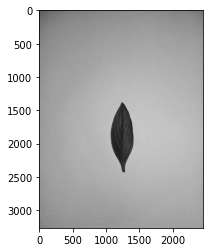

In [ ]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray,cmap="gray")

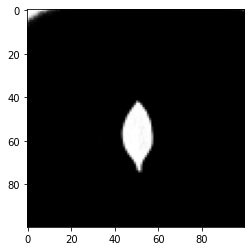

In [ ]:
tipo = cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
limiar, image_binary = cv2.threshold(image_gray , 0, 255, tipo)
image_binary = cv2.resize(image_binary, (100,100), interpolation = cv2.INTER_AREA)
plt.imshow(image_binary,cmap="gray")

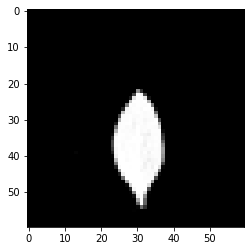

In [ ]:
image_binary = image_binary[20:80,20:80]
plt.imshow(image_binary,cmap="gray")

## Captura as caracteristicas da folha

Area da folha

In [ ]:
area = 0
for linha in range(60):
  for coluna in range(60):
    if image_binary[linha,coluna]!= 0: area += 1

Largura da folha

In [ ]:
larguras = []
for linha in range(60):
  largura = 0
  for coluna in range(60):
    if image_binary[linha,coluna]!= 0: largura += 1
  larguras.append(largura)

print("A folha possui as larguras:")
print(larguras)

A folha possui as larguras:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 6, 7, 8, 10, 11, 12, 12, 13, 13, 14, 15, 15, 15, 15, 15, 16, 15, 14, 14, 14, 12, 12, 10, 9, 8, 6, 6, 5, 3, 3, 3, 1, 0, 0, 0, 0]


Comprimento da folha

In [ ]:
comprimentos = []
for coluna in range(60):
  comprimento = 0
  for linha in range(60):
    if image_binary[linha,coluna]!= 0: comprimento += 1
  comprimentos.append(comprimento)

print("A folha possui as comprimentos:")
print(comprimentos)

A folha possui as comprimentos:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 13, 18, 21, 24, 27, 30, 33, 33, 32, 28, 23, 20, 17, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Salva os dados da folha em um dicionário pra ser adicionado a um dataset.
Vão ser consideradas a maior largura e o mais comprimento obtido da folha

In [ ]:
dados_folha = {
    "area":area,
    "largura":larguras[np.argmax(larguras)],
    "comprimento":comprimentos[np.argmax(comprimentos)]
}

Cria um dataframe

In [ ]:
df = pd.DataFrame([dados_folha])
df

,area,largura,comprimento
0,338,16,33


Salvar o dataframe em um csv

In [ ]:
df.to_csv(path)

,area,largura,comprimento
0,338,16,33
